In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.options.display.max_rows = 100

In [128]:
# !wget --directory-prefix=data/ -Nq https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv
oxford_file = 'data/OxCGRT_latest.csv'
oxford_data = pd.read_csv(oxford_file,
                          parse_dates=['Date'],
                          encoding="ISO-8859-1",
                          dtype={"RegionName": str,
                                 "RegionCode": str},
                          error_bad_lines=False)
print(oxford_data.columns)
print(oxford_data['CountryName'].unique())
oxford_data.head()

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6_Facial Coverings', 'H6_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDispla

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-01,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-02,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-03,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-04,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-05,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
cols = oxford_data.columns
for col in cols:
    if 'Index' in col or 'Flag' in col or 'Wildcard' in col:
        oxford_data.drop(columns=col, inplace=True)
oxford_data['ConfirmedCases'].fillna(0, inplace=True)
oxford_data['ConfirmedDeaths'].fillna(0, inplace=True)
oxford_data['C1_School closing'].fillna(0, inplace=True)
oxford_data['C2_Workplace closing'].fillna(0, inplace=True)
oxford_data['C3_Cancel public events'].fillna(0, inplace=True)
oxford_data['C4_Restrictions on gatherings'].fillna(0, inplace=True)
oxford_data['C5_Close public transport'].fillna(0, inplace=True)
oxford_data['C6_Stay at home requirements'].fillna(0, inplace=True)
oxford_data['C7_Restrictions on internal movement'].fillna(0, inplace=True)
oxford_data['C8_International travel controls'].fillna(0, inplace=True)
oxford_data['H1_Public information campaigns'].fillna(0, inplace=True)
oxford_data['H2_Testing policy'].fillna(0, inplace=True)
oxford_data['H3_Contact tracing'].fillna(0, inplace=True)
oxford_data['H4_Emergency investment in healthcare'].fillna(0, inplace=True)
oxford_data['H5_Investment in vaccines'].fillna(0, inplace=True)
oxford_data['H6_Facial Coverings'].fillna(0, inplace=True)


In [130]:
HYPOTHETICAL_SUBMISSION_DATE = np.datetime64("2020-11-30")
oxford_data = oxford_data[oxford_data.Date <= HYPOTHETICAL_SUBMISSION_DATE]
oxford_data['GeoID'] = oxford_data['CountryName'] + '__' + oxford_data['RegionName'].astype(str)
oxford_data['NewCases'] = oxford_data.groupby('GeoID').ConfirmedCases.diff().fillna(0)
oxford_data['NewDeaths'] = oxford_data.groupby('GeoID').ConfirmedDeaths.diff().fillna(0)
oxford_data.drop(columns=['Jurisdiction', 'RegionCode'], inplace=True)
# # Keep only columns of interest
# id_cols = ['CountryName',
#            'RegionName',
#            'GeoID',
#            'Date']
# cases_col = ['NewCases']
# npi_cols = ['C1_School closing',
#             'C2_Workplace closing',
#             'C3_Cancel public events',
#             'C4_Restrictions on gatherings',
#             'C5_Close public transport',
#             'C6_Stay at home requirements',
#             'C7_Restrictions on internal movement',
#             'C8_International travel controls',
#             'H1_Public information campaigns',
#             'H2_Testing policy',
#             'H3_Contact tracing',
#             'H6_Facial Coverings']
# oxford_data = oxford_data[id_cols + cases_col + npi_cols]
oxford_data.update(oxford_data.groupby('GeoID').NewCases.apply(
    lambda group: group.interpolate()).fillna(0))
oxford_data.head()

,CountryName,CountryCode,RegionName,Date,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,E1_Income support,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H7_Vaccination policy,ConfirmedCases,ConfirmedDeaths,GeoID,NewCases,NewDeaths
0,Aruba,ABW,NaN,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aruba__nan,0.0,0.0
1,Aruba,ABW,NaN,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aruba__nan,0.0,0.0
2,Aruba,ABW,NaN,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aruba__nan,0.0,0.0
3,Aruba,ABW,NaN,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aruba__nan,0.0,0.0
4,Aruba,ABW,NaN,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aruba__nan,0.0,0.0


<ipython-input-131-bd737c79a8e3>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(1, figsize=(5,5))
<ipython-input-131-bd737c79a8e3>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(1, figsize=(5,5))
<ipython-input-131-bd737c79a8e3>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f

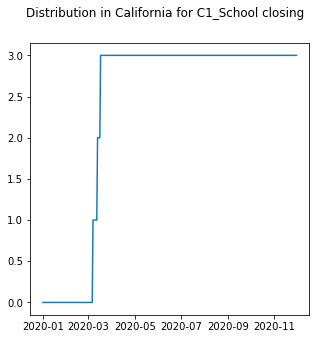

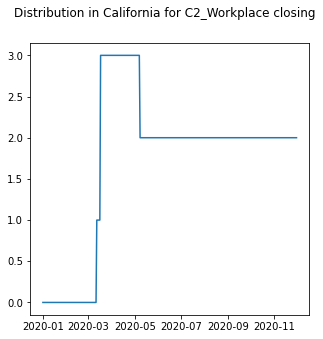

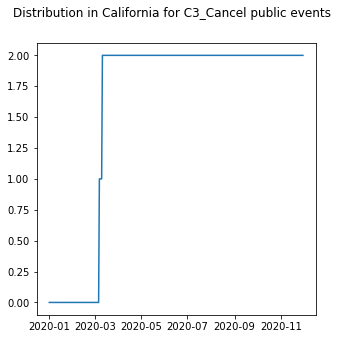

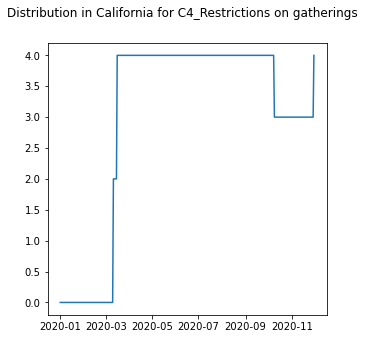

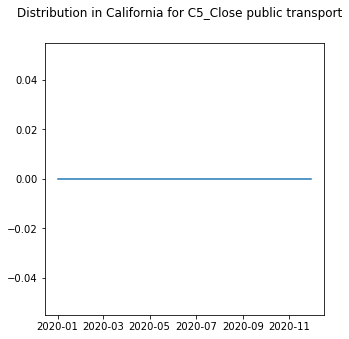

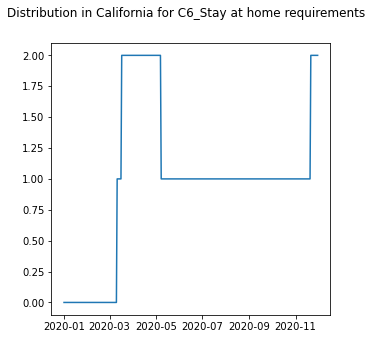

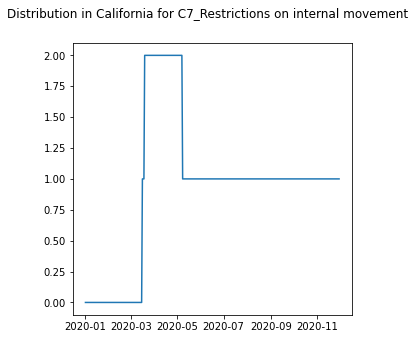

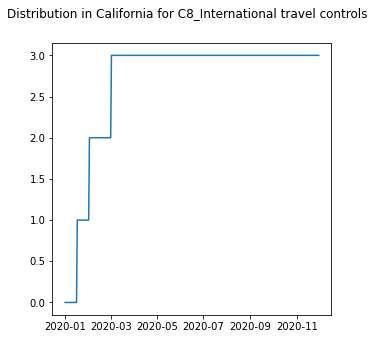

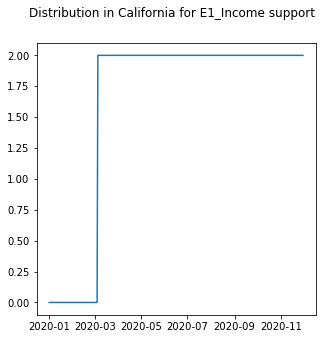

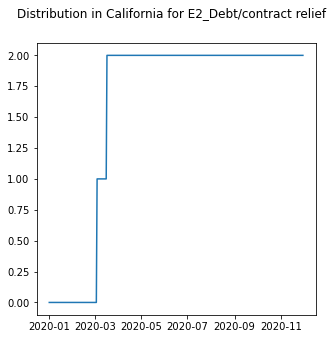

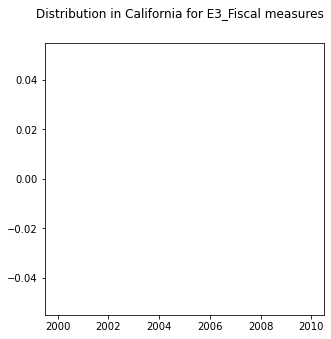

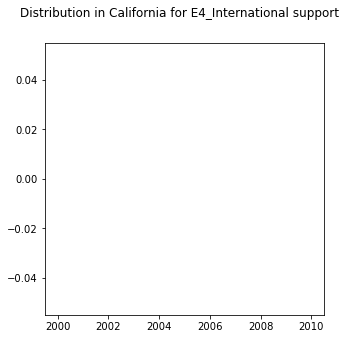

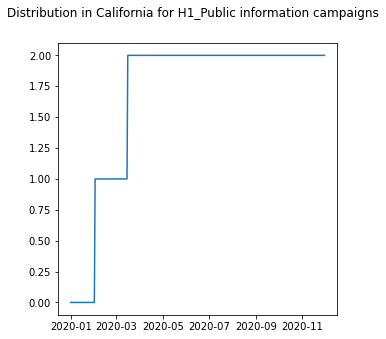

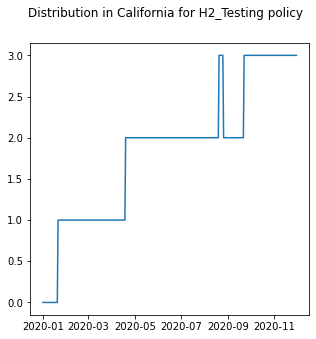

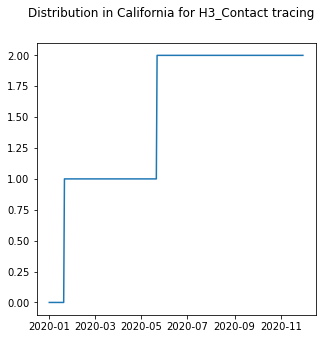

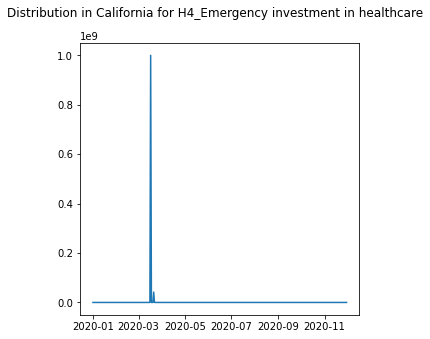

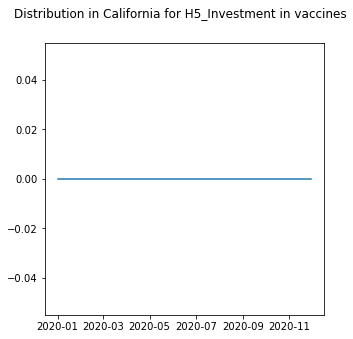

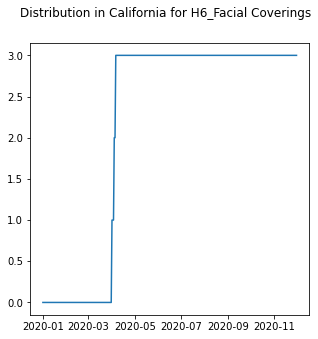

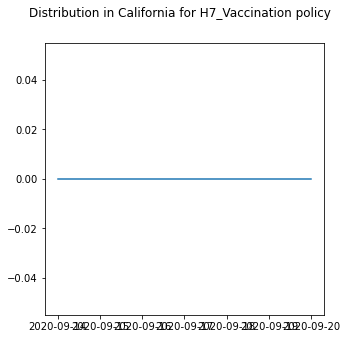

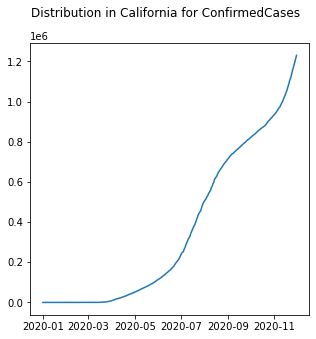

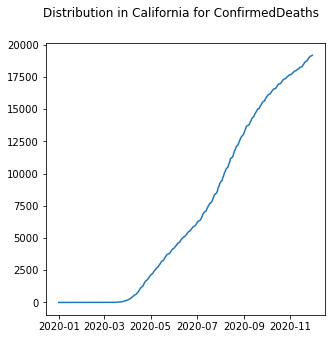

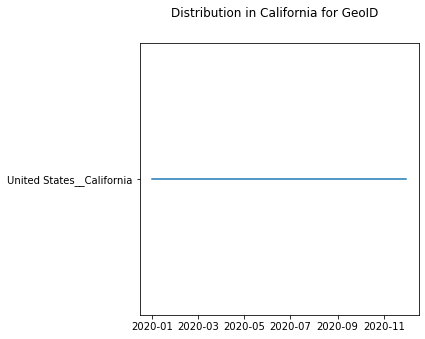

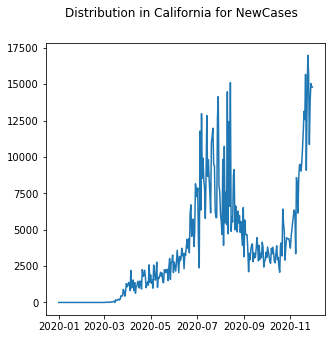

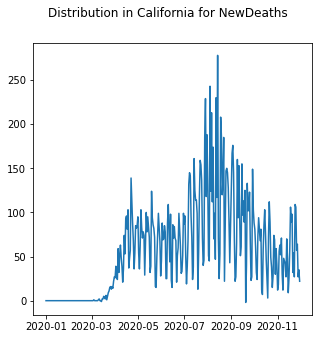

In [131]:
def display_features_for_area(region, isRegion):
    if (isRegion):
        data = oxford_data[oxford_data['RegionName'] == region]
    else:
        data = oxford_data[oxford_data['CountryName'] == region]
    for feature in data.columns[4:]:
        f, ax = plt.subplots(1, figsize=(5,5))
        plt.plot(data['Date'], data[feature])
        f.suptitle('Distribution in {r} for {f}'.format(r=region, f=feature))
    plt.show()

display_features_for_area('California', True)

<ipython-input-131-bd737c79a8e3>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(1, figsize=(5,5))
<ipython-input-131-bd737c79a8e3>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(1, figsize=(5,5))
<ipython-input-131-bd737c79a8e3>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f

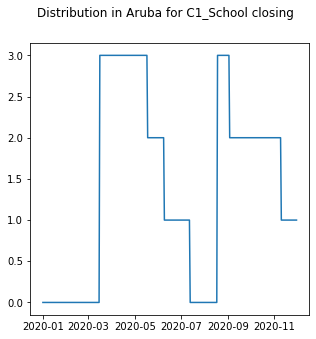

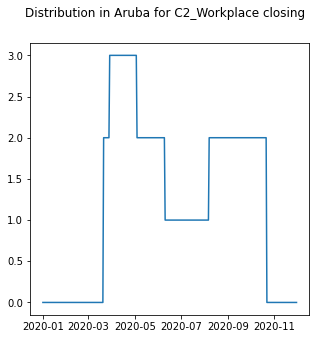

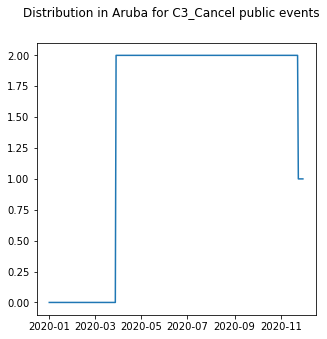

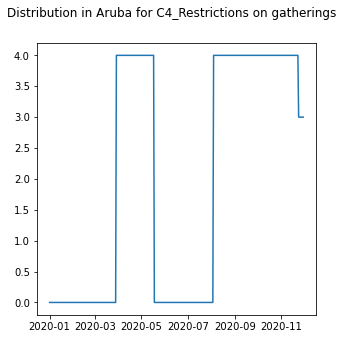

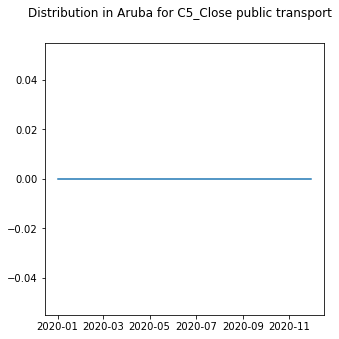

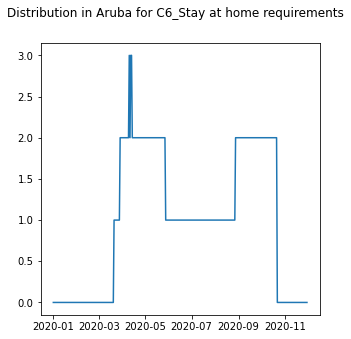

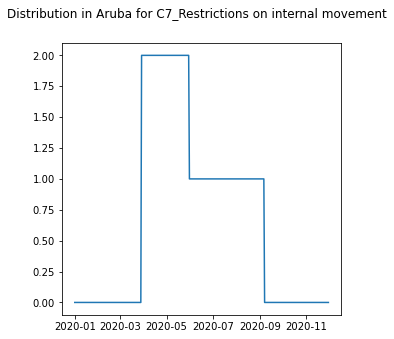

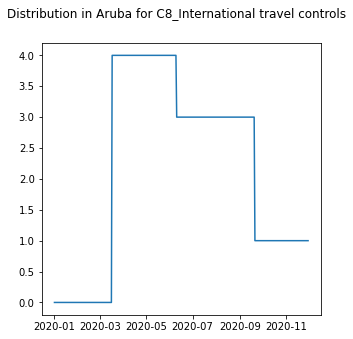

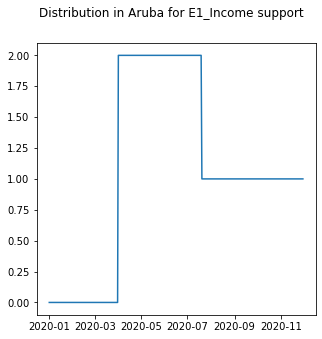

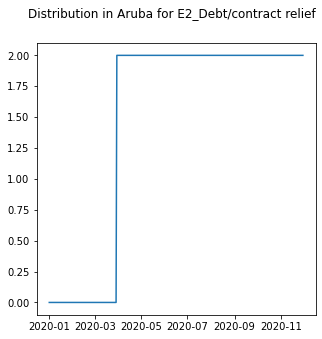

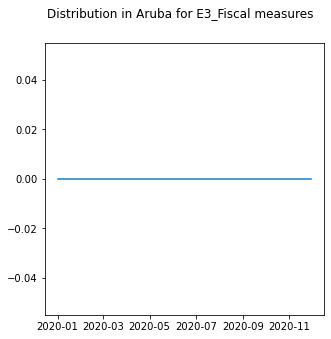

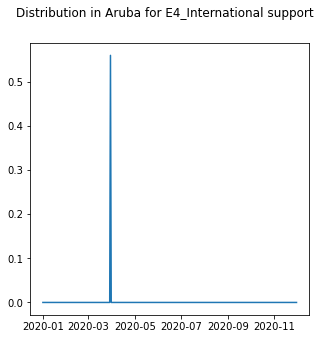

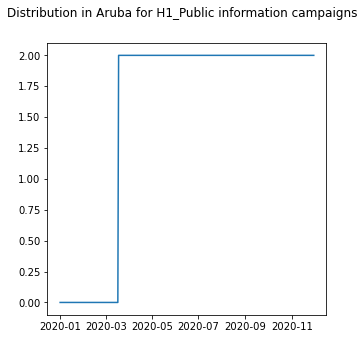

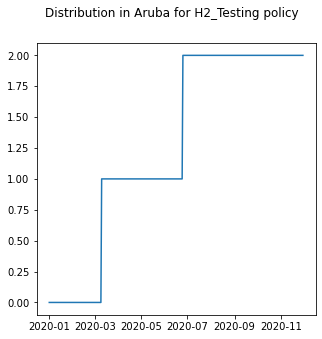

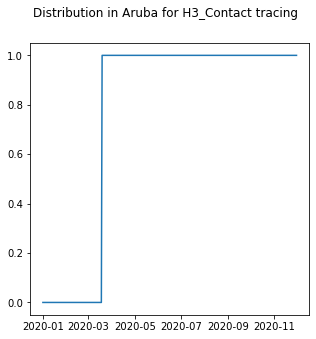

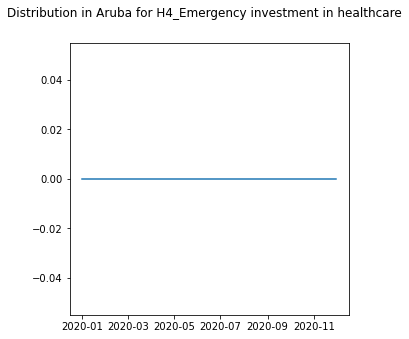

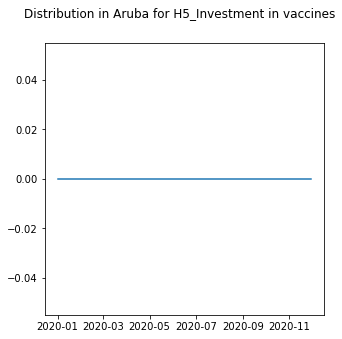

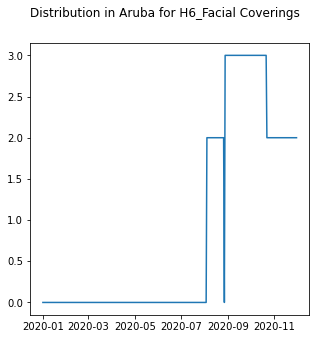

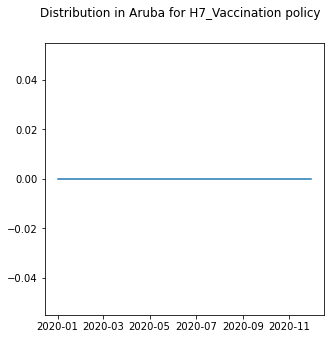

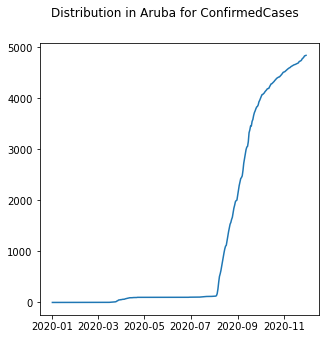

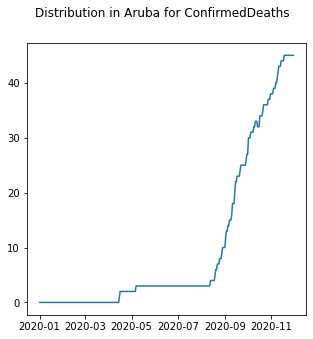

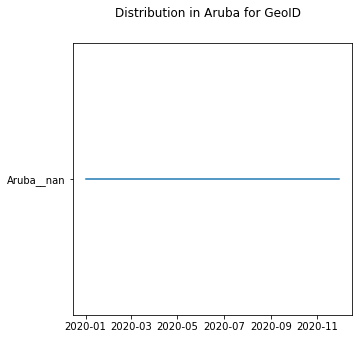

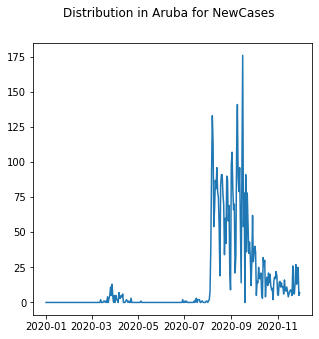

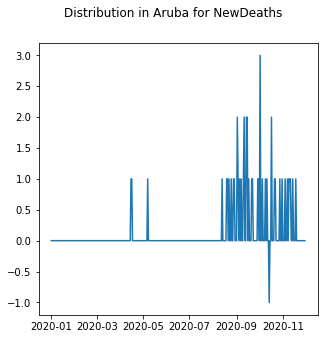

In [132]:
display_features_for_area('Aruba', False)

<ipython-input-131-bd737c79a8e3>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(1, figsize=(5,5))
<ipython-input-131-bd737c79a8e3>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(1, figsize=(5,5))
<ipython-input-131-bd737c79a8e3>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f

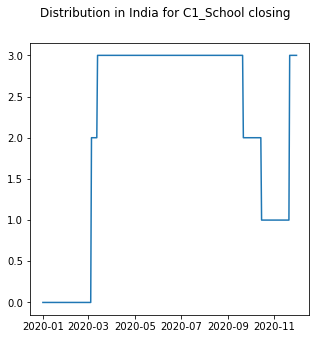

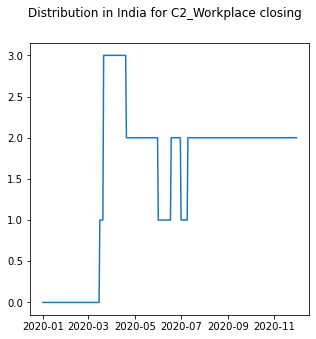

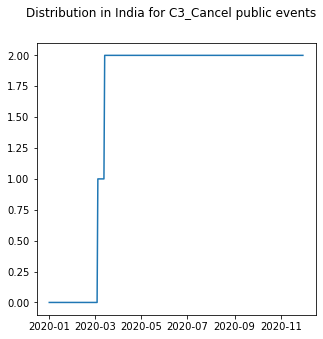

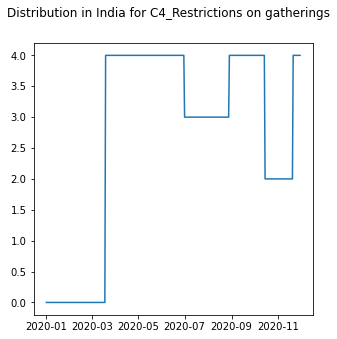

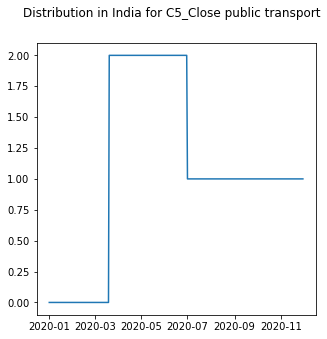

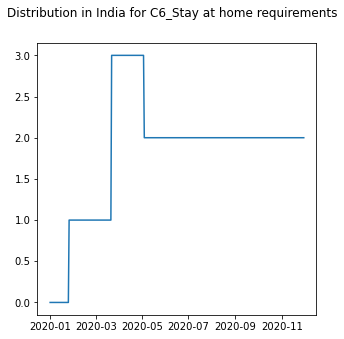

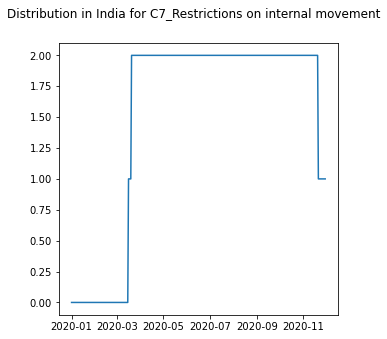

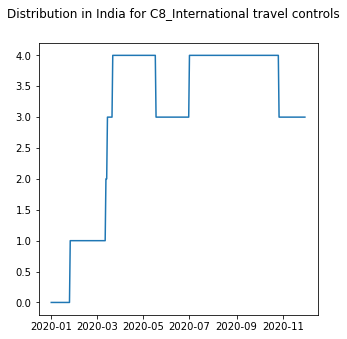

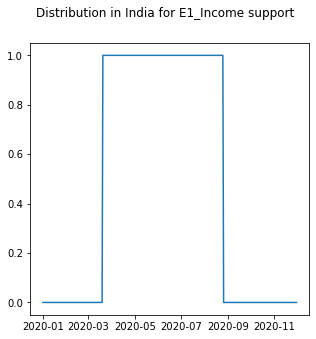

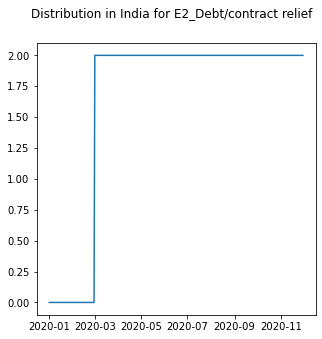

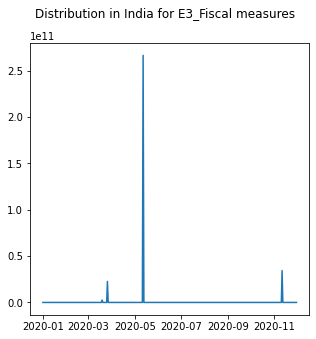

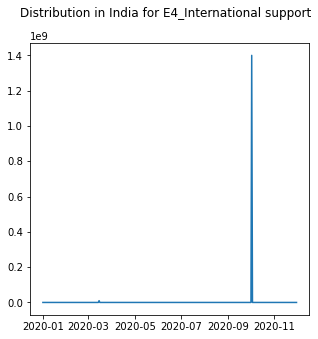

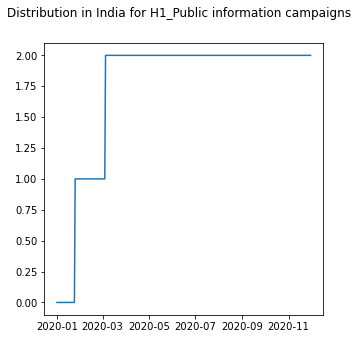

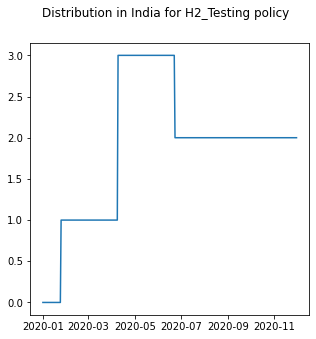

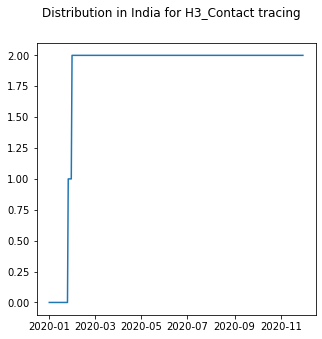

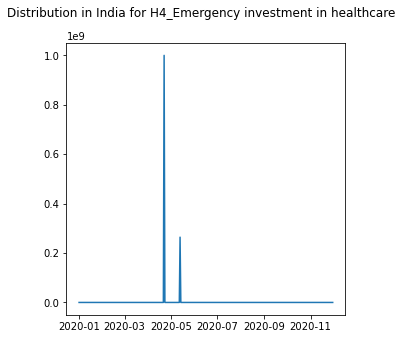

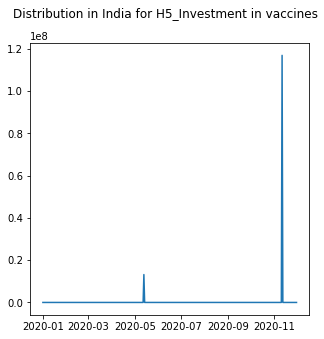

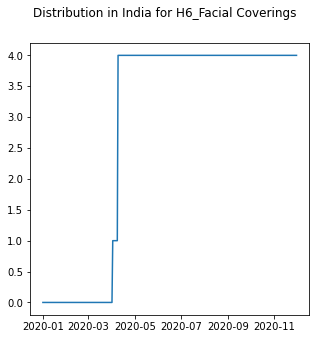

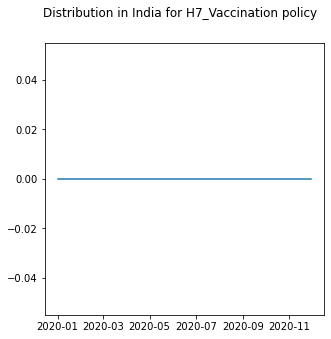

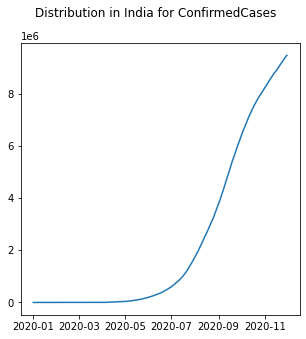

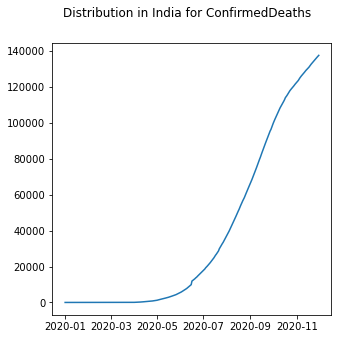

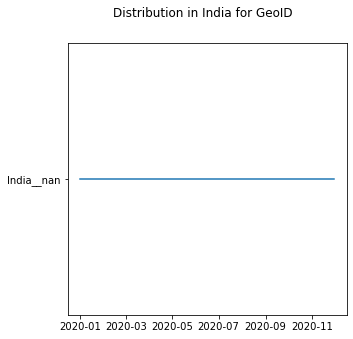

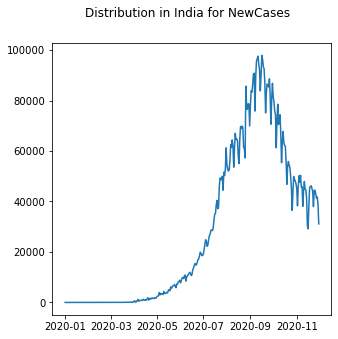

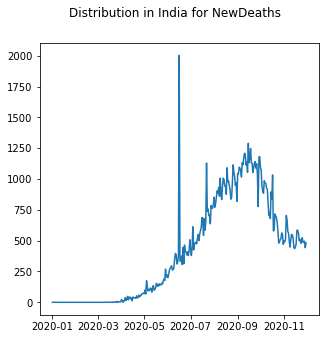

In [133]:
display_features_for_area("India", False)